# CONVOLUTIONAL NEURAL NETWORK
<br><br>
<font size=4.5 color="red"> What is Convolutional Neural Network (CNN or ConvNet) ?</font>
<br>
Convolutional Neural Network is a deep learning algorithm which is used for recognizing images. This algorithm clusters images by similarity and perform object recognition within scenes. CNN uses unique feature of images (e.g. cat's tail and ears, airplane's wing and engine etc.) to identify object that is placed on the image. Actually this process is very similar with what our brain does to identify objects. <br>
Traditional neural networks are not ideal for image processing that's why we are using CNN. Altough CNN is not too different from ANN. Because in the end CNN algorithm uses Artificial Neural Networks but before that CNN uses some layers to gather information and determine some features from the image.
<br>
<img src="https://cdn-images-1.medium.com/max/1600/1*N4h1SgwbWNmtrRhszM9EJg.png" />
<br>
What are these layers or processes? How CNN works?
-  Convolution
-  Padding
-  Pooling
-  Flattening
-  Full Connection

<br>
<br>
<font size=4.5 color="red"> Convolutional Layer (Convolutional Operation)</font>
<br>
This process is main process for CNN. In this operation there is a feature detector or filter. This filter detects edges or specific shapes. Filter is placed top left of image and multiplied with value on same indices. After that all results are summed and this result is written to output matrix. Then filter slips to right to do this whole processes again and again. Usually filter slips one by one but it can be change according to your model and this slipping process is called 'stride'. Bigger stride means smaller output. Sometimes stride value is increased to decrease output size and time.
<br><br>
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQoNDQAgN5M94MXU7K6sjqSW4FkVmAvY18DQGKf9ux27wA1w9Sm"/>
<br>
Let's try to understand process above with a visualization.
<br>
<img src="https://i2.wp.com/tuncerergin.com/wp-content/uploads/2018/02/giphy.gif?fit=480%2C272"/>
<br>
After convolutional operations we will use an activation function to break up linearity. We want to increase non-linearity otherwise algorithm can't understand image and act like it is a linear function. In other algorithms we usually use sigmoid and tanh functions as activation functions but in Convolutional Neural Network we are using **ReLU** becuase ReLU function is better for time-efficiency.
<br>
<img src="https://cdn-images-1.medium.com/max/1600/1*XxxiA0jJvPrHEJHD4z893g.png"/>
<br><br>
<font size=4.5 color="red">Padding</font>
<br>
We have to keep as much information we can in early processes of CNN. But convolutional operations we mentioned above decrease size of image that's why we apply <font color="blue">**Padding**</font> to preserve our input size.
<br>
For example our input size is 36x36x3 but after convolutional operations we have output with size of 32x32x3 we will fix it by adding some padding like below.
<img src="https://i2.wp.com/tuncerergin.com/wp-content/uploads/2018/02/XzUSmeu.png?w=263"/>
<br><br>
<font size=4.5 color="red">Pooling</font>
<br>
This layer is used for reducing parameters and computating process. Also by using this layer features invariant to scale or orientation changes are detected and it prevents overfitting. There are some pooling process like average pooling, max pooling etc. But mostly **max pooling** is used. Let's say we have a 2x2 filter and an 4x4 input(image) results of max pooling and average pooling will be like that:
(stride = 2)
<br>
<img src="https://www.researchgate.net/profile/Zenghui_Wang2/publication/317496930/figure/fig1/AS:551445004066816@1508486142257/Average-versus-max-pooling_W840.jpg" />
<br>
<br>
<font size=4.5 color="red">Flattening</font>
<br>
Basically flattening is taking matrix came from convolutional and pooling processes and turn it into one dimensional array. This is important because input of fully-connected layer -or let's say Artifical Neural Networks- consist of one dimensional array.
<br>
<img src="https://cdn-images-1.medium.com/max/1600/1*Lzx2pNLpHjGTKcofsaSH1g.png" width=400/>
<br><br>
<font size=4.5 color="red">Full Connection</font>
<br>
This layer takes data from one dimension array we saw above and starts learning process.
<img src="https://cdn-images-1.medium.com/max/1600/1*Gh5PS4R_A5drl5ebd_gNrg@2x.png" width=600/>

## Convolutional Neural Network with Keras

<font size=4.5 color="red">Dropout</font>
<br>
Dropout is a regularizaton technique for reducing overfitting. It is called "dropout" because it drops out visible or hidden units in neural network.
<br>
<img src="http://perso.mines-paristech.fr/fabien.moutarde/ES_MachineLearning/TP_convNets/drop.png"/>
<br>
<br>
Let's look dataset we'll use.
<br><br><br>
<font size=4.5 color="blue">About Dataset</font>
<br>
Now we’ll try to use this algorithm with a dataset contains images of 10 different classes of clothing.
Dataset consists a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
-  Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total.
-  Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255.
-  The training and test data sets have 785 columns. The first column consists of the class labels, and represents class of clothing. The rest of the columns contain the pixel-values of the associated image.
<br>
<br>
Each training and test example is assigned to one of the following labels:
<br>
-  0 T-shirt/top
-  1 Trouser
-  2 Pullover
-  3 Dress
-  4 Coat
-  5 Sandal
-  6 Shirt
-  7 Sneaker
-  8 Bag
-  9 Ankle boot

### Import Libraries and Read Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading Train Data
dfTrain = pd.read_csv("dataframes/fashion-mnist/fashion-mnist_train.csv")
print("Shape of Train Data: " + str(dfTrain.shape))

Shape of Train Data: (60000, 785)


In [3]:
# First 5 rows of train data
dfTrain.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Reading Test Data
dfTest = pd.read_csv("dataframes/fashion-mnist/fashion-mnist_test.csv")
print("Shape of Test Data: " + str(dfTest.shape))

Shape of Test Data: (10000, 785)


In [5]:
# First 5 rows of test data
dfTest.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
Y_train = dfTrain.label
X_train = dfTrain.drop(["label"], axis=1)
X_test = dfTest.drop(["label"], axis=1)
Y_test = dfTest.label

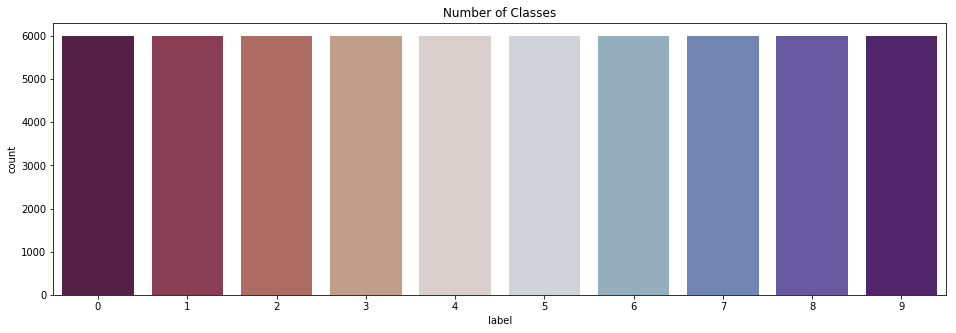

In [7]:
plt.figure(figsize=(16,5))
sns.countplot(Y_train, palette="twilight_shifted_r")
plt.title("Number of Classes")
plt.show()

### Example Images

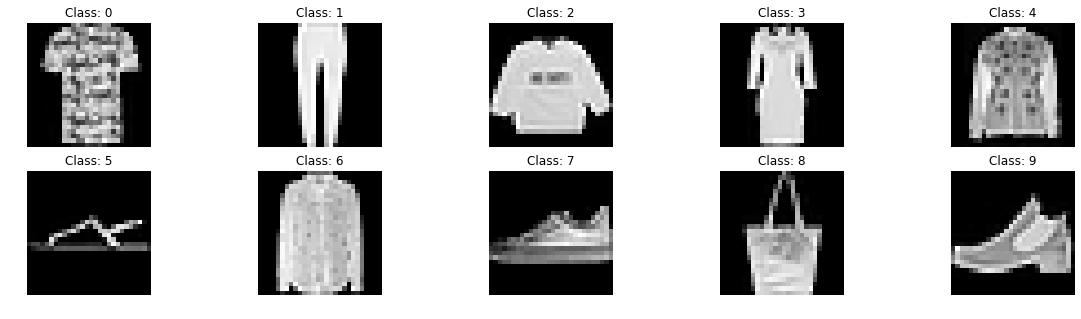

In [8]:
plt.figure(figsize=(20,5))

for i in range(10):
    plt.subplot(2,5,i+1)
    img = dfTrain[dfTrain.label==i].iloc[0,1:].values
    img = img.reshape((28,28))
    plt.imshow(img, cmap='gray')
    plt.title("Class: " + str(i))
    plt.axis('off')
    
plt.show()

### Normalization
<br>
We'll use normalization to reduce effect of illumination's differences. Also it contributes to works CNN faster.

In [9]:
# Normalization
X_train = X_train / 255.0
X_test = X_test / 255.0

### Reshape
<br>
Our images are 28x28 but to using Keras they have to be 3D matrices. That's why we reshape them as 28x28x1, we'll use 1 channel because our images are gray scaled. (e.g. grayscale images has only one channel, rgb image has three channels)

In [10]:
# Reshape
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)

X_train Shape:  (60000, 28, 28, 1)
X_test Shape:  (10000, 28, 28, 1)


### Label Encoding
<br>
We turn our classes into one-hot encoding label.
<br>
<img src="https://i.stack.imgur.com/Fcdj4.jpg"/>

In [11]:
# Label Encoding
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(Y_train, num_classes=10)

Using TensorFlow backend.


### Train-Test Split
<br>
We'll split our train data 30% of data will be validation data and 70% of data will be train data.

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size = 0.3, random_state = 42)

print("x_train shape",x_train.shape)
print("x_test shape",x_val.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_val.shape)

x_train shape (42000, 28, 28, 1)
x_test shape (18000, 28, 28, 1)
y_train shape (42000, 10)
y_test shape (18000, 10)


### Implementing Convolutional Neural Network Algorithm with Keras
<br>
<font size=4.5 color="blue">Create Model</font>

In [13]:
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))


<font size=4.5 color="blue">Optimizer</font>

We'll use 'Adam Optimizer'. Adam is an optimization algorithm that can used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data. It is different to classical stochastic gradient descent. SGD pursues a single learning rate for all weights updates and learning rate(alpha) doesn't change during training process. However in adam optimizer we can say adam optimizer updates leraning rate dynamically.
<br>
<img src="https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2017/05/Comparison-of-Adam-to-Other-Optimization-Algorithms-Training-a-Multilayer-Perceptron.png" />

In [14]:
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

<font size=4.5 color="blue">Compile Model</font>
<br>
Since we have 10 classes we'll use categorical crossentropy.

In [15]:
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics=['accuracy'])

<font size=4.5 color="blue">Epoch and Batch Size</font>
<br>
Epoch is the number of times the algorithm sees the entire data set. If one epoch is too big to run to the computer at once we divide it smaller parts and number of this parts is called batch.

In [16]:
epochs = 50
batchSize = 300

<font size=4.5 color="blue">Data Augmentation</font>
<br>
By using "data augmentation" we can create new data with different orientations. It prevents overfitting.
<img src="https://developers.google.com/machine-learning/practica/image-classification/images/data_augmentation.png"/>

In [17]:
# Data Augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=0.1,  # randomly rotate images in the range
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally
        height_shift_range=0.1,  # randomly shift images vertically
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

<font size=4.5 color="blue">Fit The Model</font>

In [18]:
cnn = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batchSize), epochs=epochs, validation_data=(x_val, y_val), steps_per_epoch=x_train.shape[0] // batchSize)

Epoch 1/50
140/140 [==============================] - 279s 2s/step - loss: 1.0101 - acc: 0.6174 - val_loss: 0.6132 - val_acc: 0.7601
Epoch 2/50
140/140 [==============================] - 275s 2s/step - loss: 0.6648 - acc: 0.7422 - val_loss: 0.5339 - val_acc: 0.7899
Epoch 3/50
140/140 [==============================] - 252s 2s/step - loss: 0.5966 - acc: 0.7716 - val_loss: 0.4451 - val_acc: 0.8312
Epoch 4/50
140/140 [==============================] - 255s 2s/step - loss: 0.5503 - acc: 0.7883 - val_loss: 0.4204 - val_acc: 0.8431
Epoch 5/50
140/140 [==============================] - 271s 2s/step - loss: 0.5117 - acc: 0.8033 - val_loss: 0.3929 - val_acc: 0.8508
Epoch 6/50
140/140 [==============================] - 278s 2s/step - loss: 0.4834 - acc: 0.8163 - val_loss: 0.3735 - val_acc: 0.8583
Epoch 7/50
140/140 [==============================] - 255s 2s/step - loss: 0.4654 - acc: 0.8219 - val_loss: 0.3459 - val_acc: 0.8714
Epoch 8/50
140/140 [==============================] - 311s 2s/step - 

### Evaluate The Model

In [33]:
print("Accuracy after fitting: {:.2f}%".format(cnn.history['acc'][-1]*100))

Accuracy after fitting: 89.92%


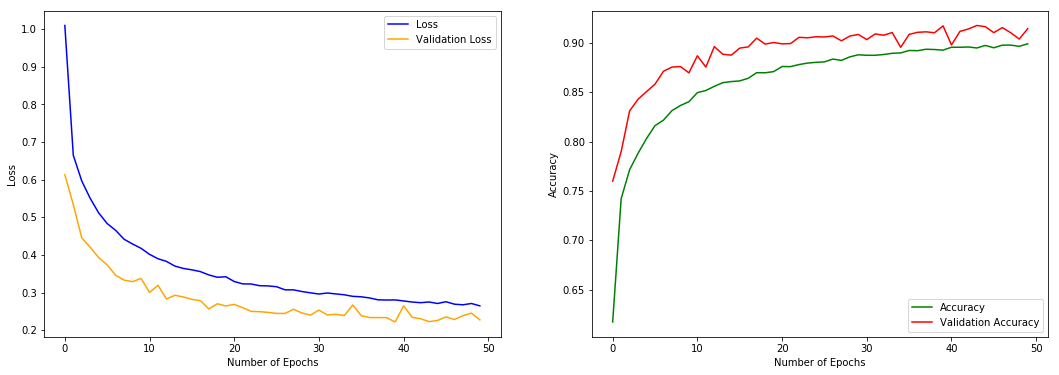

In [29]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
plt.plot(cnn.history['loss'], color="blue", label = "Loss")
plt.plot(cnn.history['val_loss'], color="orange", label = "Validation Loss")
plt.ylabel("Loss")
plt.xlabel("Number of Epochs")
plt.legend()

plt.subplot(1,2,2)
plt.plot(cnn.history['acc'], color="green", label = "Accuracy")
plt.plot(cnn.history['val_acc'], color="red", label = "Validation Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Number of Epochs")
plt.legend()
plt.show()

Let's find out score by giving test data we imported before.

In [59]:
Y_test = to_categorical(Y_test, num_classes=10) # One-Hot Encoding

In [71]:
score = model.evaluate(X_test, Y_test)
print("Test Loss: {:.4f}".format(score[0]))
print("Test Accuracy: {:.2f}%".format(score[1]*100))

10000/10000 [==============================] - 30s 3ms/step
Test Loss: 0.2069
Test Accuracy: 92.18%


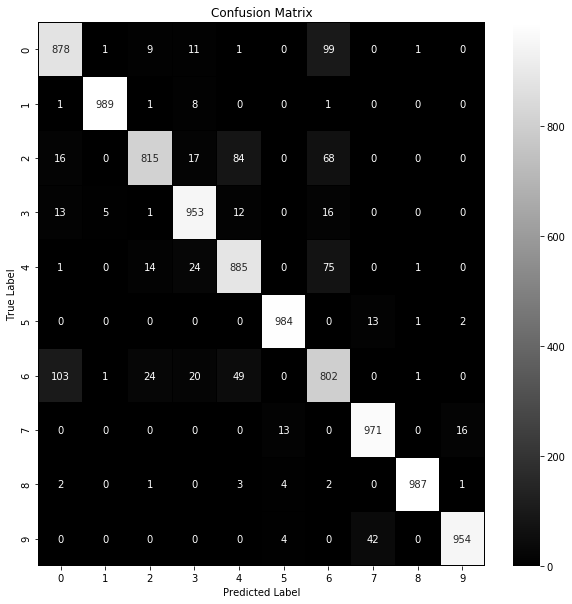

In [70]:
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis = 1)
Y_true = np.argmax(Y_test, axis = 1)
confusionMatrix = confusion_matrix(Y_true, Y_pred_classes)

f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(confusionMatrix, annot=True, linewidths=0.1, cmap = "gist_yarg_r", linecolor="black", fmt='.0f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [74]:
confusionMatrix

array([[878,   1,   9,  11,   1,   0,  99,   0,   1,   0],
       [  1, 989,   1,   8,   0,   0,   1,   0,   0,   0],
       [ 16,   0, 815,  17,  84,   0,  68,   0,   0,   0],
       [ 13,   5,   1, 953,  12,   0,  16,   0,   0,   0],
       [  1,   0,  14,  24, 885,   0,  75,   0,   1,   0],
       [  0,   0,   0,   0,   0, 984,   0,  13,   1,   2],
       [103,   1,  24,  20,  49,   0, 802,   0,   1,   0],
       [  0,   0,   0,   0,   0,  13,   0, 971,   0,  16],
       [  2,   0,   1,   0,   3,   4,   2,   0, 987,   1],
       [  0,   0,   0,   0,   0,   4,   0,  42,   0, 954]])

In [ ]:
for i in confusionMatrix:
    for j in confusionMatrix[i]:
        